# Preblem Statement & Instructions
# Credit card default risk
#### Max Score: 100
Credit card default rist is the chance that companies or individuals will not be able to return the money lent on time.

### Task
You are given relevent information about the customers of a company.

You are required to build a machine learning model that can predict if there will be credit card default.

### Dataset decription
The dataset folder contains the following files:
* train.csv: 45528 x 19
* test.csv: 11383 x 18
* sample_submission.csv: 5 x 2

The columns provided in the dataset are as follows:

Colomn name | Description
---|---
customer_id | Represents the unique identification of a customer
name | Represents the name of a customer
age | Represents the age of a customer ( in years )
gender | Represents the gender of a customr( F means Female and M means Male )
owns_car | Represents whether a customer owns a car ( Y means Yes and N Means No )
owns_house | Represents whether a customer owns a house ( Y means Yes and N Means No )
no_of_children | Represents the number of children of a customer
net_yearly_income | Represents the net yearly income of a customer ( in USD )
no_days_employed | Represents the no of days employed
occupation_type | Represents the occupation type of a customer ( IT staff, Managers, Accountants, Cooking staff, etc )
total_family_members | Represents the number of family members of a customer
migrant_worker | Represents whether a customer is a migrant worker ( 1 means Yes 0 means No )
yearly_debt_payments | Represents the yearly debt paymentd of a customer ( in USD )
credit_limit | Represents credit limit of a customer ( in USD )
credit_limit_used(%) | Represents the percentage of credit limit used by a customer
credit_score | Represents the credit score of a customer
prev_defaults | Represents te number of prev_defaults | Represents the number of previous defaults
default_in_last_6months | Represents whether a customer has defaulted in last 6 months ( 1 means Yes and 0 means No )
credit_card_default | Represents whether there will be credit card default ( 1 means Yes and 0 means No )

### Evaluation metric
### `score = 100*(metrics.f1_score(actual, predicted, average= "marco" ))`

### Result submission guidelines 
* The index is "customer_id" and the target is the "credit_card_default" column.
* The submission file must be submitted in .csv format only.
The size of this submission file must be  11383 x 2.

Note: Ensure that your submisison file contains the following:
* Correct index values as per the test file
* Correct names of columns as provided in sample_submission.csv file

### `Download dataset`

# Imports

In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation
from sklearn.metrics import f1_score

# Read Files

In [2]:
# file Paths
train_path = "/content/drive/MyDrive/Data Science/AmExpert Codelab/dataset/train.csv"
test_path = "/content/drive/MyDrive/Data Science/AmExpert Codelab/dataset/test.csv"
sample_submision_path = "/content/drive/MyDrive/Data Science/AmExpert Codelab/dataset/sample_submission.csv"

In [3]:
# read files
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_sam_sub = pd.read_csv(sample_submision_path)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [4]:
df_test

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,CST_142412,Solarina,53,F,N,N,0.0,266824.38,3051.0,Sales staff,1.0,0.0,17791.56,64483.93,74,823.0,0,0
11379,CST_107967,Jonathan Cable,33,F,NaN,N,0.0,124310.85,365248.0,Unknown,1.0,0.0,26576.79,29851.73,60,712.0,0,0
11380,CST_134002,Robin,27,M,Y,Y,1.0,364652.81,3431.0,Laborers,3.0,0.0,28658.55,69336.96,67,674.0,0,0
11381,CST_146856,Lauren,36,F,N,Y,0.0,128769.02,16320.0,Medicine staff,1.0,0.0,11527.38,26908.03,17,684.0,0,0


In [5]:
df_sam_sub

,customer_id,credit_card_default
0,CST_115179,1
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [7]:
# Check for duplicate records
len(df['customer_id'].unique())

45528

In [8]:
# Check for class balance
df['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [9]:
# Check for class balance
df['credit_card_default'].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

## Null Value Treatments

### Imputations
Which impputations suits??
* Imputes feature wise: 


 Feature with nulls | Findings why/how it is null | Imputations
 --- | --- | --- |
 owns_car | Don't know Null (Y=33.87%, N=66.12%, 547 nan) | Max Liklyhood, N
 no_of_children | Don't know Null (0 is also there so, nan is Don't know Null) |  Max Liklyhood, 0 Child
 no_of_days_employed | Don't know Null (Min. is 2.0) | Mean
 total_family_members | Don't know Null (0 is not possible, 1 is for independent 1 is there so nan is Don't know Null) | Mean
 migrant_worker | Don't know Null (1 and 0 both are present so nan is Null) | Max Liklyhood 0
 yearly_debt_payments | Don't know Null or Not Applicable Nulls | Mean
 credit_score | Don't know Null | Mean

In [10]:
df.isnull().sum() 

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [11]:
# Null Columns are 'owns_car', 'no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'yearly_debt_payments', 'credit_score'
# Find the reason why these are null before impute

In [12]:
df.loc[df['owns_car'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
40,CST_156606,Taylor,47,F,NaN,Y,0.0,229370.35,352.0,Sales staff,2.0,0.0,35347.36,27213.73,87,733.0,0,0,0
119,CST_110661,Caroline Valetkevitch,45,M,NaN,Y,0.0,213866.59,2272.0,Core staff,2.0,0.0,22836.78,71050.18,21,802.0,0,0,0
150,CST_144508,Kevin,43,M,NaN,Y,0.0,610226.68,3251.0,Managers,2.0,0.0,48463.33,148288.36,78,823.0,0,0,0
183,CST_131607,Aruna,25,M,NaN,N,0.0,122705.67,2447.0,Managers,2.0,0.0,34009.63,16517.28,16,665.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,CST_127836,LaCapra,55,F,NaN,N,1.0,221724.65,1790.0,Core staff,3.0,1.0,27504.97,50281.86,84,779.0,0,0,0
44926,CST_113974,"""Michael OBoyle""",43,M,NaN,N,0.0,386696.89,2061.0,Unknown,2.0,0.0,59403.97,47130.02,91,865.0,0,0,0
45031,CST_163360,Suoninen,52,F,NaN,Y,0.0,50508.14,365250.0,Unknown,1.0,0.0,17180.46,6284.39,51,888.0,0,0,0
45092,CST_142503,Joshua,51,F,NaN,Y,0.0,169915.25,108.0,Unknown,2.0,0.0,26129.71,41163.07,60,807.0,0,0,0


In [13]:
# It is actualy don't know  Null
df['owns_car'].unique()

array(['N', 'Y', nan], dtype=object)

In [14]:
df['owns_car'].value_counts(normalize=True)

N    0.661235
Y    0.338765
Name: owns_car, dtype: float64

In [15]:
df.loc[df['no_of_children'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
21,CST_151332,James,36,F,N,Y,NaN,253922.42,433.0,Unknown,2.0,0.0,51044.13,60924.47,19,651.0,0,0,0
175,CST_112440,Bill Rigby,28,M,N,Y,NaN,212895.36,202.0,Drivers,2.0,0.0,21339.60,40426.83,66,917.0,0,0,0
282,CST_161348,Finn,28,F,Y,Y,NaN,149523.96,2914.0,Laborers,2.0,0.0,12073.56,31801.84,74,839.0,0,0,0
351,CST_107098,Carlos Ruano,36,F,N,Y,NaN,198164.00,1662.0,Core staff,1.0,0.0,42780.73,41247.55,53,940.0,0,0,0
355,CST_128600,Ransdell,53,F,N,N,NaN,143494.83,2082.0,Medicine staff,2.0,0.0,10886.44,43976.09,11,858.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,CST_106408,Jonathan Stempel,25,F,N,Y,NaN,213591.36,365252.0,Unknown,1.0,0.0,46060.71,78439.39,81,684.0,0,0,0
45271,CST_153298,Toonkel,33,F,N,Y,NaN,142130.61,365240.0,Unknown,2.0,0.0,23970.20,36064.30,94,821.0,0,0,0
45334,CST_103305,Joseph Ax,49,F,N,Y,NaN,101754.29,4445.0,Core staff,1.0,0.0,10717.50,14420.42,70,684.0,0,0,0
45336,CST_136199,Grant,26,F,N,Y,NaN,220105.96,3979.0,Sales staff,NaN,0.0,26035.06,75625.81,40,892.0,0,0,0


In [16]:
# It is actualy don't know  Null, because 0 is also there
df['no_of_children'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [17]:
df.loc[df['no_of_days_employed'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
211,CST_147816,Mehra,45,M,N,Y,0.0,110897.12,NaN,Laborers,1.0,0.0,14579.29,25222.14,27,726.0,0,0,0
257,CST_148391,Walter,48,F,N,Y,2.0,234617.11,NaN,Sales staff,4.0,0.0,28964.61,79545.74,96,873.0,0,0,0
574,CST_144296,Caroline,43,F,N,Y,0.0,187315.23,NaN,Security staff,1.0,0.0,25846.28,30561.75,97,835.0,0,0,0
609,CST_155492,Geller,31,F,N,Y,0.0,206390.42,NaN,Sales staff,2.0,1.0,28787.91,33914.30,53,816.0,0,0,0
743,CST_151791,Jones,42,M,Y,Y,1.0,82268.01,NaN,Drivers,3.0,0.0,11736.08,26113.18,48,711.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44771,CST_109278,Francesca L,50,F,N,Y,0.0,41189.41,NaN,Unknown,2.0,0.0,41443.52,4483.55,25,738.0,0,0,0
45106,CST_103766,Tjibbe Hoekstra,54,F,N,Y,0.0,156097.01,NaN,Laborers,1.0,0.0,26951.34,32829.01,93,664.0,0,0,0
45181,CST_137362,Praveen,37,F,N,Y,0.0,121325.61,NaN,Security staff,2.0,1.0,24900.90,31230.53,66,827.0,0,0,0
45371,CST_150539,Stempel,54,F,Y,Y,2.0,82964.66,NaN,Cleaning staff,4.0,1.0,39510.18,27861.75,4,947.0,0,0,0


In [18]:
# It is actualy don't know  Null
df['no_of_days_employed'].unique()

array([  612.,  2771.,   204., ..., 10398., 10009.,  5372.])

In [19]:
df['no_of_days_employed'].min()

2.0

In [20]:
df[df['total_family_members'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
1385,CST_137784,Ann,27,F,N,Y,0.0,88642.71,1727.0,High skill tech staff,NaN,0.0,17842.87,11832.50,79,540.0,0,0,1
1648,CST_165885,Siddiqui,25,F,N,Y,0.0,553782.66,3375.0,Sales staff,NaN,0.0,30540.36,76737.31,47,883.0,0,0,0
1667,CST_146594,Gerry,31,F,N,N,0.0,124215.72,3572.0,Sales staff,NaN,0.0,44501.67,23608.27,18,764.0,0,0,0
2186,CST_128402,Abhijit,27,F,N,Y,0.0,189179.43,727.0,Cooking staff,NaN,0.0,11446.56,41136.62,93,856.0,0,0,0
2394,CST_123542,Robin Paxton,24,F,Y,N,0.0,286211.21,4246.0,Sales staff,NaN,0.0,39592.58,62998.60,25,670.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43338,CST_108067,Jason Lange,39,F,Y,Y,0.0,39691.99,365245.0,Unknown,NaN,0.0,16059.26,14150.78,0,861.0,0,0,0
44179,CST_121980,Alistair Barr,26,F,N,Y,0.0,169636.38,4900.0,Sales staff,NaN,0.0,22327.93,28503.47,73,942.0,0,0,0
44481,CST_103122,Krishna N,40,F,N,Y,0.0,115292.38,12594.0,Secretaries,NaN,0.0,23475.68,30661.63,27,663.0,0,0,0
45123,CST_107611,arani Krishnan,39,F,Y,N,0.0,120018.09,1275.0,Drivers,NaN,1.0,25808.88,21208.60,67,676.0,0,0,0


In [21]:
# It is actualy don't know  Null, because 1 is also there
df['total_family_members'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., nan,  7.,  8.,  9., 10.])

In [22]:
df.loc[df['migrant_worker'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
114,CST_143524,Herbert,51,F,N,Y,0.0,128675.13,2855.0,Unknown,2.0,NaN,12097.89,25834.20,76,890.0,0,0,0
229,CST_132188,Alastair,48,F,Y,Y,1.0,235586.38,1542.0,Sales staff,2.0,NaN,36881.21,87717.63,55,876.0,0,0,0
1300,CST_144902,"""John",51,F,Y,Y,0.0,191789.11,365244.0,Unknown,2.0,NaN,18834.51,34042.27,92,729.0,0,0,0
1752,CST_164875,Chatterjee,39,F,N,Y,0.0,52416.40,365251.0,Unknown,2.0,NaN,30631.27,9094.25,70,717.0,0,0,0
1936,CST_137176,Alex,23,F,N,Y,1.0,211228.85,7130.0,Cooking staff,2.0,NaN,30106.40,82723.65,84,697.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39756,CST_145173,Alan,34,F,N,N,0.0,127549.58,365250.0,Unknown,1.0,NaN,24223.12,49000.62,6,809.0,0,0,0
41032,CST_114486,Kate Holton,50,F,N,Y,0.0,88744.98,365244.0,Unknown,2.0,NaN,17890.78,28359.23,42,822.0,0,0,0
41259,CST_143373,Jan,45,F,Y,Y,0.0,180512.07,823.0,Laborers,2.0,NaN,37503.09,66250.51,3,848.0,0,0,0
41552,CST_164061,Schnurr,47,F,N,Y,1.0,144735.91,6206.0,Laborers,3.0,NaN,21174.42,20920.28,30,925.0,0,0,0


In [23]:
# Don't know type null
df['migrant_worker'].unique()

array([ 1.,  0., nan])

In [24]:
df['migrant_worker'].value_counts(normalize=True)

0.0    0.820889
1.0    0.179111
Name: migrant_worker, dtype: float64

In [25]:
df.loc[df['yearly_debt_payments'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
195,CST_163699,Kubota,45,F,N,Y,0.0,200314.14,615.0,Security staff,2.0,1.0,NaN,34067.55,78,789.0,0,0,0
253,CST_141322,Miguel,34,F,N,Y,0.0,141554.19,495.0,Unknown,2.0,0.0,NaN,21871.16,43,842.0,0,0,0
347,CST_130343,John,33,M,N,Y,3.0,600445.87,2110.0,Managers,5.0,1.0,NaN,148313.03,40,774.0,0,0,0
819,CST_134253,Gareth,46,M,Y,N,1.0,89229.34,8000.0,Laborers,3.0,0.0,NaN,14702.16,26,934.0,0,0,0
1142,CST_160469,Moon,34,M,N,Y,2.0,109526.94,3551.0,Unknown,4.0,1.0,NaN,26312.59,93,945.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42369,CST_149278,Malone,53,F,N,N,0.0,199637.58,8973.0,Core staff,2.0,0.0,NaN,28516.93,0,702.0,0,0,0
44289,CST_148637,Trogni,50,F,N,Y,0.0,81306.27,333.0,Sales staff,2.0,0.0,NaN,15228.92,3,688.0,0,0,0
44570,CST_145386,eth,27,F,Y,Y,0.0,219275.66,498.0,Unknown,1.0,0.0,NaN,40175.36,90,684.0,0,0,0
44954,CST_139801,Gabriel,36,F,N,Y,0.0,121907.22,962.0,Sales staff,2.0,0.0,NaN,36309.82,90,792.0,0,0,0


In [26]:
df['yearly_debt_payments'].unique()

array([33070.28, 15329.53, 48416.6 , ..., 22707.51, 20150.1 , 34603.78])

In [27]:
# Is is non zero null, also don't know null or NA nulls.
df['yearly_debt_payments'].min()

2237.47

In [28]:
df.loc[df['yearly_debt_payments'].isnull()]['credit_card_default'].value_counts()

0    87
1     8
Name: credit_card_default, dtype: int64

In [29]:
df.loc[df['credit_score'].isnull()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
2428,CST_158226,Cable,35,M,N,N,0.0,123818.30,503.0,Drivers,2.0,0.0,29352.74,31033.98,62,NaN,0,0,0
4352,CST_165659,Menon,27,F,Y,Y,0.0,199174.42,2067.0,Laborers,2.0,0.0,15608.86,35796.50,68,NaN,0,0,0
7384,CST_124436,Gavin Jones,50,M,N,N,0.0,332714.21,1061.0,Sales staff,1.0,0.0,32973.57,52213.67,62,NaN,0,0,0
16180,CST_119729,Lisa Baertlein,24,F,N,Y,0.0,244882.10,455.0,Unknown,1.0,0.0,60867.31,63574.88,73,NaN,1,1,1
18873,CST_133555,Selam,42,M,Y,Y,0.0,228386.12,1382.0,Laborers,2.0,1.0,34579.76,64087.72,33,NaN,0,0,0
19951,CST_118114,Subhadip Sircar,32,F,N,Y,0.0,146287.81,1948.0,Unknown,2.0,0.0,28426.08,49628.48,48,NaN,0,0,0
29076,CST_143867,Sarah,50,F,N,Y,0.0,220868.01,365250.0,Unknown,1.0,0.0,8616.70,69047.56,30,NaN,0,0,0
35736,CST_125991,Qing,35,F,N,N,2.0,227682.89,4190.0,Unknown,4.0,0.0,42300.34,37956.84,46,NaN,0,0,0


In [30]:
# Don't know nulls
df['credit_score'].unique()

array([544., 857., 650., 754., 927., 937., 733., 906., 783., 666., 781.,
       889., 643., 909., 874., 763., 582., 699., 753., 710., 651., 893.,
       519., 895., 801., 880., 943., 795., 886., 832., 823., 766., 904.,
       919., 922., 673., 738., 684., 851., 695., 902., 724., 931., 811.,
       848., 737., 717., 891., 814., 723., 800., 715., 692., 947., 912.,
       735., 782., 843., 900., 532., 883., 713., 679., 934., 797., 730.,
       863., 949., 702., 867., 688., 774., 923., 676., 876., 703., 667.,
       620., 926., 835., 608., 736., 655., 808., 905., 948., 658., 731.,
       825., 677., 681., 682., 946., 672., 864., 833., 815., 828., 700.,
       894., 698., 890., 793., 689., 660., 802., 810., 853., 789., 777.,
       752., 870., 761., 701., 719., 628., 785., 750., 525., 872., 640.,
       856., 888., 792., 760., 865., 696., 824., 709., 740., 668., 846.,
       929., 786., 859., 728., 917., 944., 674., 915., 665., 840., 512.,
       892., 546., 942., 794., 898., 751., 742., 71

In [31]:
# Imputations
df['owns_car'] = df['owns_car'].fillna('N')
df['no_of_children'] = df['no_of_children'].fillna(0)
df['no_of_days_employed'] = df['no_of_days_employed'].fillna(df['no_of_days_employed'].mean())
df['total_family_members'] = df['total_family_members'].fillna(df['total_family_members'].mean())
df['migrant_worker'] = df['migrant_worker'].fillna(0)
df['yearly_debt_payments'] = df['yearly_debt_payments'].fillna(df['yearly_debt_payments'].mean())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45528 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

## Analysis & Feature Engineering

In [33]:
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [34]:
df['credit_card_default'].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

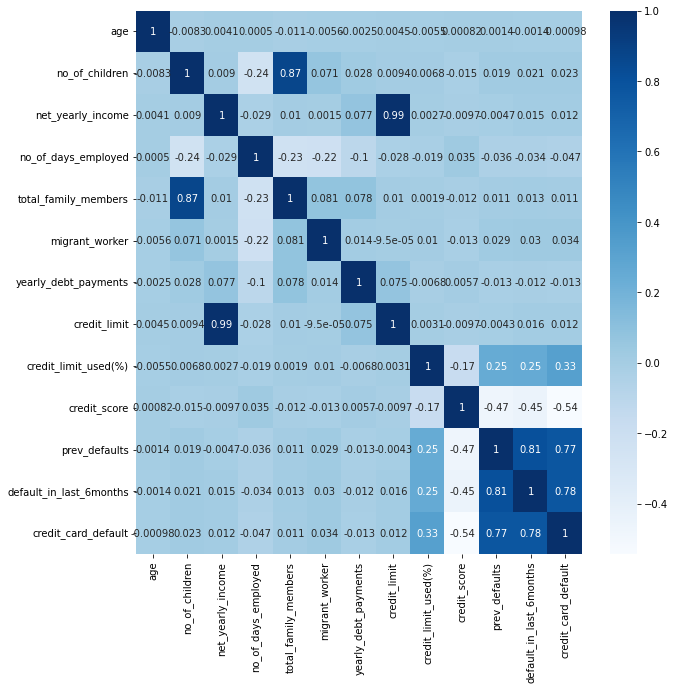

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

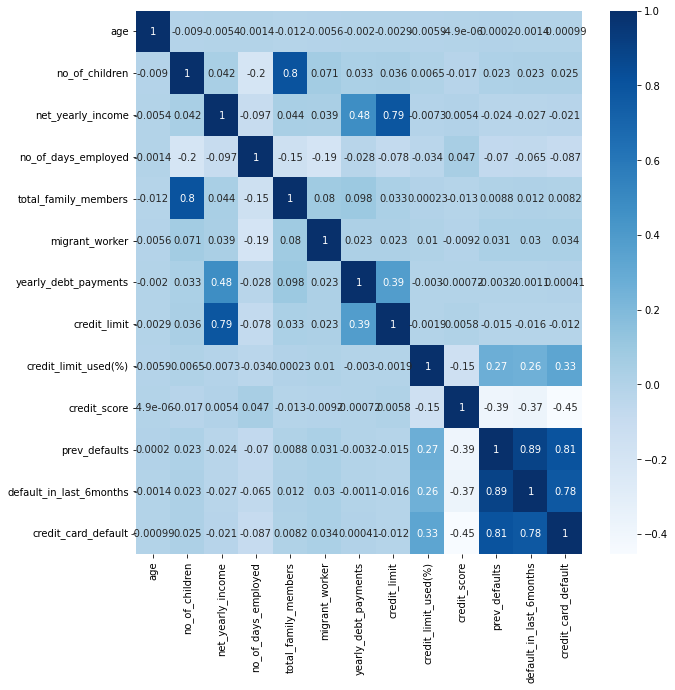

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Blues')

In [37]:
# dataframes for 0 and 1 class
# seaborn will take too much time
df0 = df.loc[df['credit_card_default']==0].copy()
df1 = df.loc[df['credit_card_default']==1].copy()

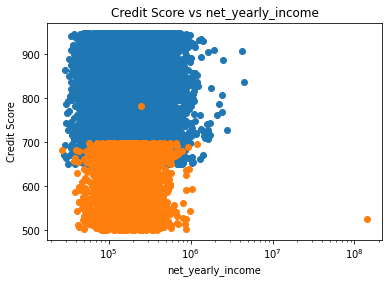

In [38]:
plt.plot(df0['net_yearly_income'], df0['credit_score'], 'o')
plt.plot(df1['net_yearly_income'], df1['credit_score'], 'o')
plt.title('Credit Score vs net_yearly_income')
plt.xlabel('net_yearly_income')
plt.ylabel('Credit Score')
plt.xscale('log')

Text(0, 0.5, 'Credit Score')

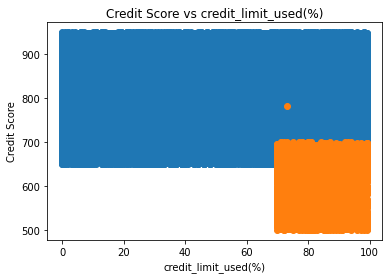

In [39]:
plt.plot(df0['credit_limit_used(%)'], df0['credit_score'], 'o')
plt.plot(df1['credit_limit_used(%)'], df1['credit_score'], 'o')
plt.title('Credit Score vs credit_limit_used(%)')
plt.xlabel('credit_limit_used(%)')
plt.ylabel('Credit Score')
# plt.xscale('log')

*There are defaults only when credit limit used more then ~70%.*

Text(0, 0.5, 'Credit Score')

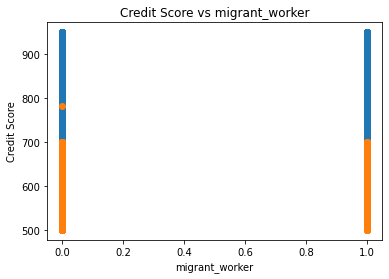

In [40]:
plt.plot(df0['migrant_worker'], df0['credit_score'], 'o')
plt.plot(df1['migrant_worker'], df1['credit_score'], 'o')
plt.title('Credit Score vs migrant_worker')
plt.xlabel('migrant_worker')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

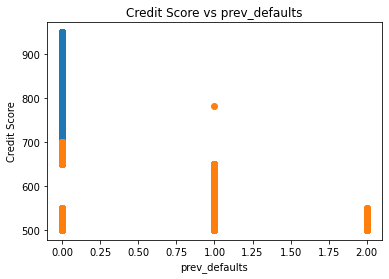

In [41]:
plt.plot(df0['prev_defaults'], df0['credit_score'], 'o')
plt.plot(df1['prev_defaults'], df1['credit_score'], 'o')
plt.title('Credit Score vs prev_defaults')
plt.xlabel('prev_defaults')
plt.ylabel('Credit Score')
# plt.xscale('log')

In [42]:
df0['credit_score'].min()

650.0

In [43]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


Text(0, 0.5, 'Credit Score')

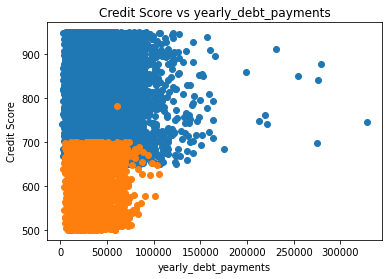

In [44]:
plt.plot(df0['yearly_debt_payments'], df0['credit_score'], 'o')
plt.plot(df1['yearly_debt_payments'], df1['credit_score'], 'o')
plt.title('Credit Score vs yearly_debt_payments')
plt.xlabel('yearly_debt_payments')
plt.ylabel('Credit Score')
# plt.xscale('log')

Text(0, 0.5, 'Credit Score')

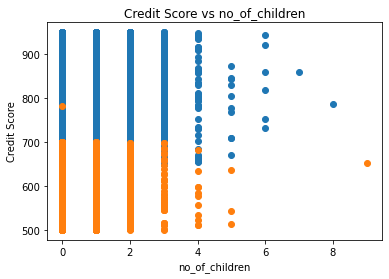

In [45]:
plt.plot(df0['no_of_children'], df0['credit_score'], 'o')
plt.plot(df1['no_of_children'], df1['credit_score'], 'o')
plt.title('Credit Score vs no_of_children')
plt.xlabel('no_of_children')
plt.ylabel('Credit Score')
# plt.xscale('log')

Text(0, 0.5, 'Credit Score')

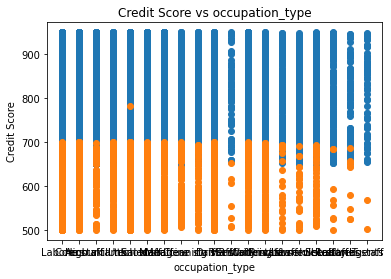

In [46]:
plt.plot(df0['occupation_type'], df0['credit_score'], 'o')
plt.plot(df1['occupation_type'], df1['credit_score'], 'o')
plt.title('Credit Score vs occupation_type')
plt.xlabel('occupation_type')
plt.ylabel('Credit Score')
# plt.xscale('log')

Text(0, 0.5, 'Credit Score')

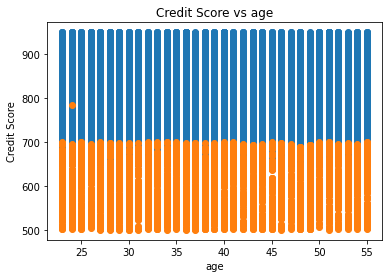

In [47]:
plt.plot(df0['age'], df0['credit_score'], 'o')
plt.plot(df1['age'], df1['credit_score'], 'o')
plt.title('Credit Score vs age')
plt.xlabel('age')
plt.ylabel('Credit Score')
# plt.xscale('log')

# Class Balance

In [48]:
df['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [49]:
# Random under-sampleing
df2 = df.loc[df['credit_card_default']==0].sample(n=3697).copy()
# All defaults
df3 = df.loc[df['credit_card_default']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_144622,Michael,47,F,N,Y,0.0,100086.80,11806.0,Unknown,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,CST_124108,Wolde,34,F,N,Y,0.0,302724.86,387.0,Laborers,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,CST_114340,Daniel Alvarenga,54,F,N,Y,1.0,109112.40,2877.0,Sales staff,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,CST_149923,Spicer,40,F,N,Y,0.0,126449.71,2146.0,Low-skill Laborers,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,CST_139965,Edward,38,F,N,N,1.0,293882.25,2155.0,Laborers,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,CST_109792,Ed Stoddard,52,F,Y,Y,0.0,57336.63,365243.0,Unknown,1.0,0.0,18213.89,11508.61,96,666.0,0,0,0
7390,CST_165909,Gould,49,M,Y,Y,1.0,162576.58,610.0,Security staff,3.0,0.0,20258.45,43604.27,81,501.0,0,0,1
7391,CST_164827,Schwartz,29,M,Y,Y,2.0,129933.94,116.0,Laborers,4.0,0.0,20428.81,20375.80,90,597.0,1,1,1
7392,CST_162901,Sierra,29,F,N,Y,1.0,138446.65,1379.0,Laborers,3.0,0.0,31960.01,46613.60,83,547.0,1,0,1


# Preprocessing

In [50]:
df4.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_144622,Michael,47,F,N,Y,0.0,100086.80,11806.0,Unknown,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,CST_124108,Wolde,34,F,N,Y,0.0,302724.86,387.0,Laborers,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,CST_114340,Daniel Alvarenga,54,F,N,Y,1.0,109112.40,2877.0,Sales staff,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,CST_149923,Spicer,40,F,N,Y,0.0,126449.71,2146.0,Low-skill Laborers,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,CST_139965,Edward,38,F,N,N,1.0,293882.25,2155.0,Laborers,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0


In [51]:
# categorical features
df_cat = df4.select_dtypes(include='object').copy()
df_num = df4.select_dtypes(exclude='object').copy()
df_num

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,47,0.0,100086.80,11806.0,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,34,0.0,302724.86,387.0,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,54,1.0,109112.40,2877.0,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,40,0.0,126449.71,2146.0,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,38,1.0,293882.25,2155.0,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,52,0.0,57336.63,365243.0,1.0,0.0,18213.89,11508.61,96,666.0,0,0,0
7390,49,1.0,162576.58,610.0,3.0,0.0,20258.45,43604.27,81,501.0,0,0,1
7391,29,2.0,129933.94,116.0,4.0,0.0,20428.81,20375.80,90,597.0,1,1,1
7392,29,1.0,138446.65,1379.0,3.0,0.0,31960.01,46613.60,83,547.0,1,0,1


In [52]:
enc = OrdinalEncoder()
df_cat = pd.DataFrame(enc.fit_transform(df_cat.drop(['customer_id', 'name'], axis=1)), 
                      columns=df_cat.columns[2:])
df_cat

,gender,owns_car,owns_house,occupation_type
0,0.0,0.0,1.0,17.0
1,0.0,0.0,1.0,8.0
2,0.0,0.0,1.0,14.0
3,0.0,0.0,1.0,9.0
4,0.0,0.0,0.0,8.0
...,...,...,...,...
7389,0.0,1.0,1.0,17.0
7390,1.0,1.0,1.0,16.0
7391,1.0,1.0,1.0,8.0
7392,0.0,0.0,1.0,8.0


In [53]:
df_num.reset_index(drop=True, inplace=True)
df_num

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,47,0.0,100086.80,11806.0,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,34,0.0,302724.86,387.0,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,54,1.0,109112.40,2877.0,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,40,0.0,126449.71,2146.0,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,38,1.0,293882.25,2155.0,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,52,0.0,57336.63,365243.0,1.0,0.0,18213.89,11508.61,96,666.0,0,0,0
7390,49,1.0,162576.58,610.0,3.0,0.0,20258.45,43604.27,81,501.0,0,0,1
7391,29,2.0,129933.94,116.0,4.0,0.0,20428.81,20375.80,90,597.0,1,1,1
7392,29,1.0,138446.65,1379.0,3.0,0.0,31960.01,46613.60,83,547.0,1,0,1


In [54]:
df_num

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,47,0.0,100086.80,11806.0,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,34,0.0,302724.86,387.0,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,54,1.0,109112.40,2877.0,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,40,0.0,126449.71,2146.0,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,38,1.0,293882.25,2155.0,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,52,0.0,57336.63,365243.0,1.0,0.0,18213.89,11508.61,96,666.0,0,0,0
7390,49,1.0,162576.58,610.0,3.0,0.0,20258.45,43604.27,81,501.0,0,0,1
7391,29,2.0,129933.94,116.0,4.0,0.0,20428.81,20375.80,90,597.0,1,1,1
7392,29,1.0,138446.65,1379.0,3.0,0.0,31960.01,46613.60,83,547.0,1,0,1


In [55]:
train_df = pd.concat([df_cat, df_num], axis=1).copy()
train_df

,gender,owns_car,owns_house,occupation_type,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,0.0,0.0,1.0,17.0,47,0.0,100086.80,11806.0,2.0,0.0,14752.90,24375.22,34,742.0,0,0,0
1,0.0,0.0,1.0,8.0,34,0.0,302724.86,387.0,2.0,0.0,68058.60,76044.60,80,543.0,1,1,1
2,0.0,0.0,1.0,14.0,54,1.0,109112.40,2877.0,3.0,1.0,21141.98,24338.05,99,691.0,0,0,1
3,0.0,0.0,1.0,9.0,40,0.0,126449.71,2146.0,2.0,0.0,21765.77,29021.80,81,510.0,2,0,1
4,0.0,0.0,0.0,8.0,38,1.0,293882.25,2155.0,3.0,0.0,38509.33,103974.47,57,713.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,0.0,1.0,1.0,17.0,52,0.0,57336.63,365243.0,1.0,0.0,18213.89,11508.61,96,666.0,0,0,0
7390,1.0,1.0,1.0,16.0,49,1.0,162576.58,610.0,3.0,0.0,20258.45,43604.27,81,501.0,0,0,1
7391,1.0,1.0,1.0,8.0,29,2.0,129933.94,116.0,4.0,0.0,20428.81,20375.80,90,597.0,1,1,1
7392,0.0,0.0,1.0,8.0,29,1.0,138446.65,1379.0,3.0,0.0,31960.01,46613.60,83,547.0,1,0,1


# Modeling

In [56]:
X = train_df.drop('credit_card_default', axis=1)
y = train_df['credit_card_default']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
transformer = Normalizer()
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)
X_test

array([[3.58747999e-06, 3.58747999e-06, 3.58747999e-06, ...,
        3.25025687e-03, 0.00000000e+00, 0.00000000e+00],
       [5.13949306e-06, 0.00000000e+00, 5.13949306e-06, ...,
        3.20704367e-03, 5.13949306e-06, 5.13949306e-06],
       [0.00000000e+00, 0.00000000e+00, 6.42151647e-06, ...,
        4.10334902e-03, 6.42151647e-06, 6.42151647e-06],
       ...,
       [4.81401632e-06, 0.00000000e+00, 4.81401632e-06, ...,
        3.17725077e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.98223307e-06, 4.98223307e-06, ...,
        3.37795402e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.11247108e-03, 0.00000000e+00, 0.00000000e+00]])

In [59]:
clf = RandomForestClassifier(max_depth=11, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [138]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = GradientBoostingClassifier(n_estimators=i, max_depth=2, random_state=0)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score: 94.1648774718313
test score: 91.92736937333481
train score: 94.87176957786879
test score: 92.21572866244604
train score: 95.39672456394425
test score: 92.17481266199637
train score: 96.04280089025852
test score: 92.25675179642573
train score: 96.91095851965498
test score: 92.25675179642573
train score: 97.31475829425035
test score: 92.33887609145341
train score: 97.69836228197212
test score: 92.4209557129783
train score: 98.04157945937287
test score: 92.42109308720647
train score: 98.4453775089867
test score: 92.50289132689204
train score: 98.5866984728468
test score: 92.54375777073022


In [139]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = GradientBoostingClassifier(n_estimators=i, max_depth=3, random_state=0)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 94.91216925488575
test score for 100: 92.25693893735131
train score for 200: 96.56770524552763
test score for 200: 92.62582321309891
train score for 300: 97.71854511163308
test score for 300: 92.66689547356735
train score for 400: 98.74821497345003
test score for 400: 92.70789558128325
train score for 500: 99.29335341317578
test score for 500: 92.83080223352376
train score for 600: 99.61639254089405
test score for 600: 92.78978093565556
train score for 700: 99.79810195455896
test score for 700: 92.7488296023543
train score for 800: 99.8788612517426
test score for 800: 92.62582321309891
train score for 900: 99.93943060858848
test score for 900: 92.7896357223321
train score for 1000: 99.97981018640299
test score for 1000: 92.58476222604324


In [140]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = GradientBoostingClassifier(n_estimators=i, max_depth=5, random_state=0)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 98.18290692498464
test score for 100: 92.42088956805523
train score for 200: 99.71734107721983
test score for 200: 92.42113378972512
train score for 300: 99.97981018640299
test score for 300: 91.9704917636602
train score for 400: 100.0
test score for 400: 92.0933990346862
train score for 500: 100.0
test score for 500: 92.09338311125433
train score for 600: 100.0
test score for 600: 92.29820611245599
train score for 700: 100.0
test score for 700: 92.38016055122856
train score for 800: 100.0
test score for 800: 92.33918467256248
train score for 900: 100.0
test score for 900: 92.21624078280996
train score for 1000: 100.0
test score for 1000: 92.2982267937149


In [61]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = XGBClassifier(n_estimators=i, max_depth=3)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 95.23497304470135
test score for 100: 92.66662470786183
train score for 200: 97.21361888337667
test score for 200: 93.19941595059076
train score for 300: 98.34421842589332
test score for 300: 93.11756436885162
train score for 400: 99.01060766439984
test score for 400: 92.91269785992822
train score for 500: 99.55579996445292
test score for 500: 93.15852321025633
train score for 600: 99.77790064315992
test score for 600: 92.99465550271758
train score for 700: 99.91923727901539
test score for 700: 92.8307877951788
train score for 800: 99.97980937325288
test score for 800: 92.91274068004917
train score for 900: 99.97980937325288
test score for 900: 92.7079053718398
train score for 1000: 99.97980937325288
test score for 1000: 92.70789558128325


In [62]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = XGBClassifier(n_estimators=i, max_depth=4)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 96.78967307273764
test score for 100: 93.32229677826913
train score for 200: 98.90965348552794
test score for 200: 92.99463198871518
train score for 300: 99.7173254985755
test score for 300: 93.03558385830367
train score for 400: 99.93942811975857
test score for 400: 93.40427163791993
train score for 500: 100.0
test score for 500: 93.3221891869892
train score for 600: 100.0
test score for 600: 93.36312504867195
train score for 700: 100.0
test score for 700: 93.28111615067121
train score for 800: 100.0
test score for 800: 93.32224746602952
train score for 900: 100.0
test score for 900: 93.40430263264996
train score for 1000: 100.0
test score for 1000: 93.36332108850114


In [66]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = LGBMClassifier(n_estimators=i, max_depth=2)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 93.4783159025004
test score for 100: 92.05061110148675
train score for 200: 94.77053813853746
test score for 200: 92.33920524375256
train score for 300: 95.75979536068706
test score for 300: 92.66689547356735
train score for 400: 96.66837274746885
test score for 400: 92.99450501037454
train score for 500: 97.11256664316727
test score for 500: 93.11751816585303
train score for 600: 97.61735287412664
test score for 600: 93.2404026102906
train score for 700: 97.98083978801469
test score for 700: 93.28143188387897
train score for 800: 98.46547126910599
test score for 800: 93.07658935648693
train score for 900: 98.86927876284989
test score for 900: 93.03563061133795
train score for 1000: 99.11157617081062
test score for 1000: 92.99467431380582


In [65]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = LGBMClassifier(n_estimators=i, max_depth=3)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 95.21490884850591
test score for 100: 92.74875171627998
train score for 200: 97.25396270977828
test score for 200: 93.36332108850112
train score for 300: 98.64716778693013
test score for 300: 93.60916691393363
train score for 400: 99.25291903600095
test score for 400: 93.56820543236132
train score for 500: 99.73752043990936
test score for 500: 93.52721577536194
train score for 600: 99.85866561277004
test score for 600: 93.32240436608214
train score for 700: 99.95961885021096
test score for 700: 93.44530819940655
train score for 800: 100.0
test score for 800: 93.07660329980297
train score for 900: 100.0
test score for 900: 92.95369685382427
train score for 1000: 100.0
test score for 1000: 93.07660329980297


In [67]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  clfx = LGBMClassifier(n_estimators=i, max_depth=4)                              
  clfx.fit(X_train, y_train)
  print(f'train score for {i}:', f1_score(y_train, clfx.predict(X_train), average='macro') * 100)
  print(f'test score for {i}:', f1_score(y_test, clfx.predict(X_test), average='macro') * 100)

train score for 100: 96.58783248482679
test score for 100: 93.1174349988923
train score for 200: 99.2731227106227
test score for 200: 93.32240436608214
train score for 300: 99.81828234440356
test score for 300: 93.28144090439172
train score for 400: 100.0
test score for 400: 93.32240436608214
train score for 500: 100.0
test score for 500: 93.19947986525369
train score for 600: 100.0
test score for 600: 93.15852321025633
train score for 700: 100.0
test score for 700: 93.28138678095176
train score for 800: 100.0
test score for 800: 93.36332108850114
train score for 900: 100.0
test score for 900: 93.15837623820204
train score for 1000: 100.0
test score for 1000: 93.19941595059076


In [60]:
clf2 = GradientBoostingClassifier(n_estimators=500, max_depth=3, random_state=0)                              
clf2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [61]:
clf3 = XGBClassifier(n_estimators=200, max_depth=3)
clf3.fit(X_train, y_train)

XGBClassifier(n_estimators=200)

In [62]:
clf4 = LGBMClassifier(n_estimators=300, max_depth=3)
clf4.fit(X_train, y_train)

LGBMClassifier(max_depth=3, n_estimators=300)

# Evaluation

In [63]:
y_pred = clf.predict(X_train)
f1_score(y_train, y_pred, average='macro') * 100

99.03088148109016

In [64]:
ytest_pred = clf.predict(X_test)
f1_score(y_test, ytest_pred, average='macro') * 100

92.37092136517064

In [65]:
train_pred = clf2.predict(X_train)
f1_score(y_train, train_pred, average='macro') * 100

99.19234197346421

In [66]:
test_pred = clf2.predict(X_test)
f1_score(y_test, test_pred, average='macro') * 100

92.2982371343027

In [67]:
train_pred3 = clf3.predict(X_train)
f1_score(y_train, train_pred3, average='macro') * 100

97.41528947857653

In [68]:
test_pred3 = clf3.predict(X_test)
f1_score(y_test, test_pred3, average='macro') * 100

93.19949812636527

In [69]:
train_pred4 = clf4.predict(X_train)
f1_score(y_train, train_pred4, average='macro') * 100

98.54610033169931

In [70]:
test_pred4 = clf4.predict(X_test)
f1_score(y_test, test_pred4, average='macro') * 100

93.1994524734024

# Final test prediction for Submission

 * Imputes feature wise in test data frame: 


 Feature with nulls | Findings why/how it is null | Imputations
 --- | --- | --- |
 owns_car | Don't know Null (Y=33.87%, N=66.12%, 547 nan) | Max Liklyhood, N
 no_of_children | Don't know Null (0 is also there so, nan is Don't know Null) |  Max Liklyhood, 0 Child
 no_of_days_employed | Don't know Null (Min. is 2.0) | Mean
 total_family_members | Don't know Null (0 is not possible, 1 is for independent 1 is there so nan is Don't know Null) | Mean
 migrant_worker | Don't know Null (1 and 0 both are present so nan is Null) | Max Liklyhood 0
 yearly_debt_payments | Don't know Null or Not Applicable Nulls | Mean
 credit_score | Don't know Null | Mean

In [71]:
df_test

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,CST_142412,Solarina,53,F,N,N,0.0,266824.38,3051.0,Sales staff,1.0,0.0,17791.56,64483.93,74,823.0,0,0
11379,CST_107967,Jonathan Cable,33,F,NaN,N,0.0,124310.85,365248.0,Unknown,1.0,0.0,26576.79,29851.73,60,712.0,0,0
11380,CST_134002,Robin,27,M,Y,Y,1.0,364652.81,3431.0,Laborers,3.0,0.0,28658.55,69336.96,67,674.0,0,0
11381,CST_146856,Lauren,36,F,N,Y,0.0,128769.02,16320.0,Medicine staff,1.0,0.0,11527.38,26908.03,17,684.0,0,0


In [72]:
df_test.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [73]:
# Imputations
df_test['owns_car'] = df_test['owns_car'].fillna('N')
df_test['no_of_children'] = df_test['no_of_children'].fillna(0)
df_test['no_of_days_employed'] = df_test['no_of_days_employed'].fillna(df_test['no_of_days_employed'].mean())
df_test['total_family_members'] = df_test['total_family_members'].fillna(df_test['total_family_members'].mean())
df_test['migrant_worker'] = df_test['migrant_worker'].fillna(0)
df_test['yearly_debt_payments'] = df_test['yearly_debt_payments'].fillna(df_test['yearly_debt_payments'].mean())
df_test['credit_score'] = df_test['credit_score'].fillna(df_test['credit_score'].mean())

In [74]:
# Preprocessing
## Handling categorical features
df_test_cat = df_test.select_dtypes(include='object').copy()
df_test_cat = pd.DataFrame(enc.fit_transform(df_test_cat.drop(['customer_id', 'name'], axis=1)), 
                      columns=df_test_cat.columns[2:])

## Numerical features
df_test_num = df_test.select_dtypes(exclude='object').copy()
df_test_num.reset_index(drop=True, inplace=True)

## Final features
test_df = pd.concat([df_test_cat, df_test_num], axis=1).copy()

## Feature scaling
test_df = transformer.fit_transform(test_df)
test_df

array([[0.00000000e+00, 4.26268459e-06, 0.00000000e+00, ...,
        3.32063129e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.70249629e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.44948261e-03, 1.30662220e-05, 0.00000000e+00],
       ...,
       [2.68595224e-06, 2.68595224e-06, 2.68595224e-06, ...,
        1.81033181e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.51535746e-06, ...,
        5.14050450e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.10581558e-06, ...,
        5.67840849e-03, 0.00000000e+00, 0.00000000e+00]])

In [75]:
predictions = pd.Series(clf.predict(test_df))
predictions

0        0
1        0
2        1
3        0
4        1
        ..
11378    0
11379    0
11380    0
11381    0
11382    0
Length: 11383, dtype: int64

In [76]:
df_sam_sub

,customer_id,credit_card_default
0,CST_115179,1
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0


In [77]:
submission = pd.concat([df_test['customer_id'], predictions], axis=1)
submission.rename(columns={'customer_id': 'customer_id', 0: 'credit_card_default'}, inplace=True)
submission

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1
...,...,...
11378,CST_142412,0
11379,CST_107967,0
11380,CST_134002,0
11381,CST_146856,0


In [78]:
submission.to_csv('submission1.csv', index=False)